<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#meta-plot_for_every_sample_CpG_GpC_stat" data-toc-modified-id="meta-plot_for_every_sample_CpG_GpC_stat-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>meta plot_for_every_sample_CpG_GpC_stat</a></span><ul class="toc-item"><li><span><a href="#293T_ERT_WT_24h_post_drug_CpG_c1_CTCF_f1k" data-toc-modified-id="293T_ERT_WT_24h_post_drug_CpG_c1_CTCF_f1k-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>293T_ERT_WT_24h_post_drug_CpG_c1_CTCF_f1k</a></span></li><li><span><a href="#293T_ERT_WT_24h_post_drug_GpC_c1_CTCF_f1k" data-toc-modified-id="293T_ERT_WT_24h_post_drug_GpC_c1_CTCF_f1k-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>293T_ERT_WT_24h_post_drug_GpC_c1_CTCF_f1k</a></span></li><li><span><a href="#293T_ERT_WT_48h_post_drug_CpG_c1_CTCF_f1k" data-toc-modified-id="293T_ERT_WT_48h_post_drug_CpG_c1_CTCF_f1k-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>293T_ERT_WT_48h_post_drug_CpG_c1_CTCF_f1k</a></span></li><li><span><a href="#293T_ERT_WT_48h_post_drug_GpC_c1_CTCF_f1k" data-toc-modified-id="293T_ERT_WT_48h_post_drug_GpC_c1_CTCF_f1k-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>293T_ERT_WT_48h_post_drug_GpC_c1_CTCF_f1k</a></span></li><li><span><a href="#293T_ERT_CTCF_24h_post_drug_Rep1_CpG_c1_CTCF_f1k" data-toc-modified-id="293T_ERT_CTCF_24h_post_drug_Rep1_CpG_c1_CTCF_f1k-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>293T_ERT_CTCF_24h_post_drug_Rep1_CpG_c1_CTCF_f1k</a></span></li><li><span><a href="#293T_ERT_CTCF_24h_post_drug_Rep1_GpC_c1_CTCF_f1k" data-toc-modified-id="293T_ERT_CTCF_24h_post_drug_Rep1_GpC_c1_CTCF_f1k-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>293T_ERT_CTCF_24h_post_drug_Rep1_GpC_c1_CTCF_f1k</a></span></li><li><span><a href="#293T_ERT_CTCF_48h_post_drug_Rep1_CpG_c1_CTCF_f1k" data-toc-modified-id="293T_ERT_CTCF_48h_post_drug_Rep1_CpG_c1_CTCF_f1k-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>293T_ERT_CTCF_48h_post_drug_Rep1_CpG_c1_CTCF_f1k</a></span></li><li><span><a href="#293T_ERT_CTCF_48h_post_drug_Rep1_GpC_c1_CTCF_f1k" data-toc-modified-id="293T_ERT_CTCF_48h_post_drug_Rep1_GpC_c1_CTCF_f1k-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>293T_ERT_CTCF_48h_post_drug_Rep1_GpC_c1_CTCF_f1k</a></span></li></ul></li></ul></div>

# meta plot_for_every_sample_CpG_GpC_stat

## 293T_ERT_WT_24h_post_drug_CpG_c1_CTCF_f1k

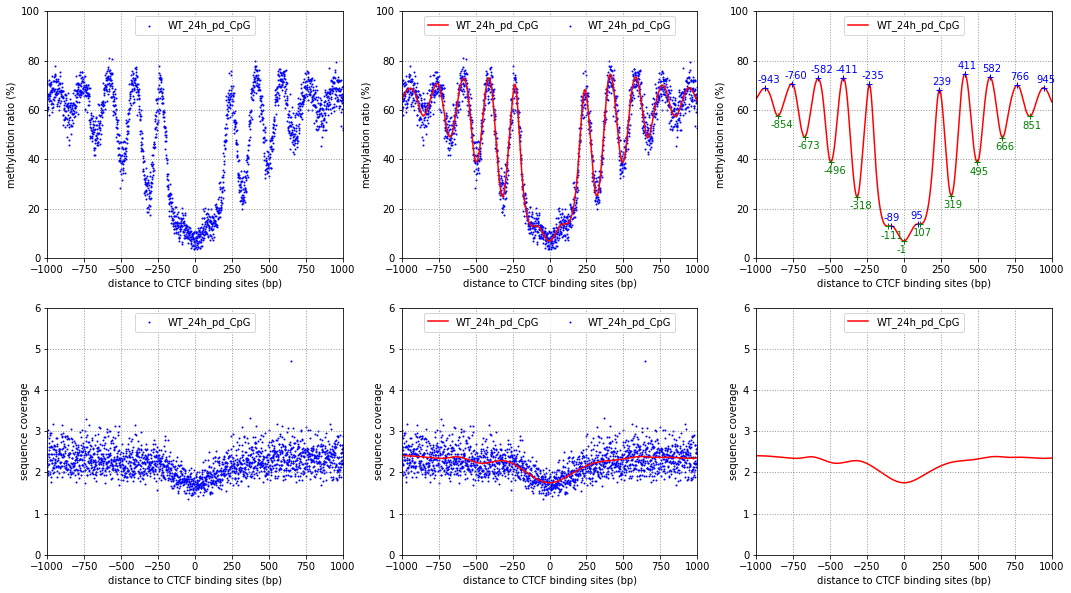

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev
from scipy.signal import find_peaks

input_file = '293T_ERT_WT_24h_pd.bismark.dedup.all_CpG_result.c1.CTCF.flank5000.stat.cut1_6.txt'
df = pd.read_csv(input_file, sep="\t", header=(0))
# distance	stack_n	avg_mC_ratio	avg_coverage	avg_mC_count	avg_unmC_count	mC_ratio_list	coverage_list	mC_count_list	unmC_count_list
distance = df.distance
avg_mC_ratio = df.avg_mC_ratio*100
avg_coverage = df.avg_coverage

# 
distance_new = np.linspace(-5000, 5000, 10000)
# 
tck_for_ratio = splrep(distance, avg_mC_ratio, s=166000)
avg_mC_ratio_smooth = splev(distance_new, tck_for_ratio)
peaks, _ = find_peaks(avg_mC_ratio_smooth)
valleys, _ = find_peaks(100-avg_mC_ratio_smooth)
#
tck_for_coverage = splrep(distance, avg_coverage, s=950)
avg_coverage_smooth = splev(distance_new, tck_for_coverage)


fig = plt.figure(figsize=(18, 10))
# ax1
ax1 = fig.add_subplot(231)
ax1.scatter(distance, avg_mC_ratio, color="b", s=1, label="WT_24h_pd_CpG")
ax1.set_xlim(-1000,1000)
ax1.set_ylim(0, 100)
ax1.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax1.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("methylation ratio (%)")
# ax2
ax2 = fig.add_subplot(232)
ax2.scatter(distance, avg_mC_ratio, color="b", s=1, label="WT_24h_pd_CpG")
ax2.plot(distance_new, avg_mC_ratio_smooth, 'r-', label="WT_24h_pd_CpG")
ax2.set_xlim(-1000, 1000)
ax2.set_ylim(0, 100)
ax2.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax2.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("methylation ratio (%)")
# ax3
ax3 = fig.add_subplot(233)
ax3.plot(distance_new, avg_mC_ratio_smooth, 'r-', label="WT_24h_pd_CpG")
# 标记 波峰summit， 波谷 valleys
for pi in peaks:
    if -1000 <= pi-5000 <= 1000:
        ax3.plot(pi-5000, avg_mC_ratio_smooth[pi], "+", color="b")
        ax3.text(pi-5000-50, avg_mC_ratio_smooth[pi]+2, str(pi-5000), color="b")
for vi in valleys:
    if -1000 <= vi-5000 <= 1000:
        ax3.plot(vi-5000, avg_mC_ratio_smooth[vi], "+", color="g")
        ax3.text(vi-5000-50, avg_mC_ratio_smooth[vi]-5, str(vi-5000), color="g")
ax3.set_xlim(-1000, 1000)
ax3.set_ylim(0, 100)
ax3.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax3.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("methylation ratio (%)")

# ax4
ax4 = fig.add_subplot(234)
ax4.scatter(distance, avg_coverage, color="b", s=1, label="WT_24h_pd_CpG")
ax4.set_xlim(-1000, 1000)
ax4.set_ylim(0, 6)
ax4.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax4.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("sequence coverage")
# ax5
ax5 = fig.add_subplot(235)
ax5.scatter(distance, avg_coverage, color="b", s=1, label="WT_24h_pd_CpG")
ax5.plot(distance_new, avg_coverage_smooth, 'r-', label="WT_24h_pd_CpG")
ax5.set_xlim(-1000, 1000)
ax5.set_ylim(0, 6)
ax5.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax5.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("sequence coverage")
# ax6
ax6 = fig.add_subplot(236)
ax6.plot(distance_new, avg_coverage_smooth, 'r-', label="WT_24h_pd_CpG")
ax6.set_xlim(-1000, 1000)
ax6.set_ylim(0, 6)
ax6.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax6.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("sequence coverage")

plt.show()
fig.savefig('293T_ERT_WT_24h_pd.bismark.dedup.all_CpG_result.c1.CTCF.f1k.stat.cut1_6.withSVMark.pdf')

## 293T_ERT_WT_24h_post_drug_GpC_c1_CTCF_f1k

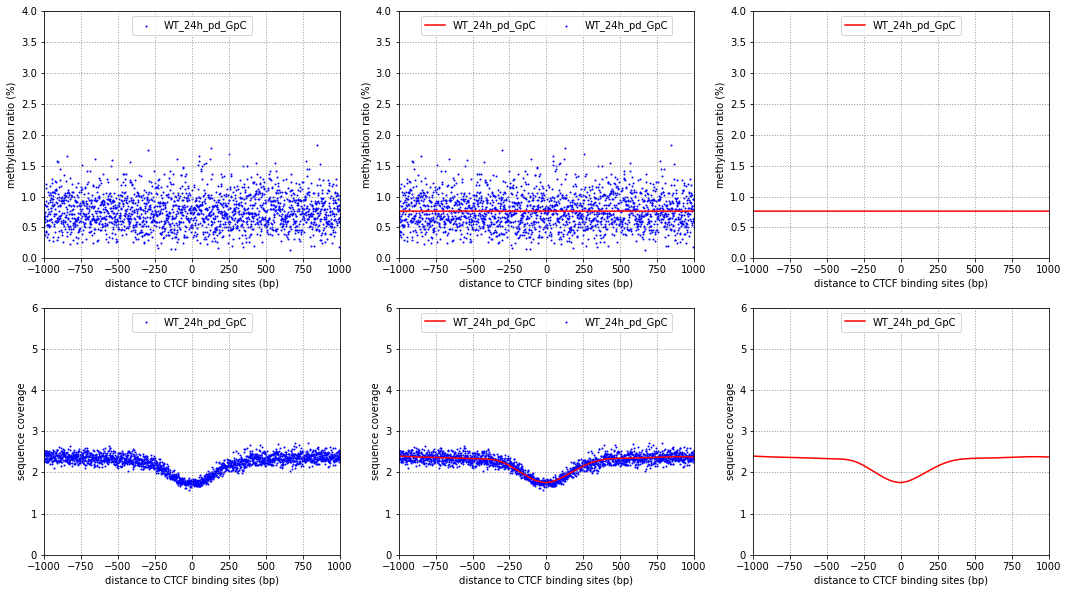

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev
from scipy.signal import find_peaks

input_file = '293T_ERT_WT_24h_pd.bismark.dedup.all_GpC_result.c1.CTCF.flank5000.stat.cut1_6.txt'
df = pd.read_csv(input_file, sep="\t", header=(0))
# distance	stack_n	avg_mC_ratio	avg_coverage	avg_mC_count	avg_unmC_count	mC_ratio_list	coverage_list	mC_count_list	unmC_count_list
distance = df.distance
avg_mC_ratio = df.avg_mC_ratio*100
avg_coverage = df.avg_coverage

# 
distance_new = np.linspace(-5000, 5000, 10000)
# 
tck_for_ratio = splrep(distance, avg_mC_ratio, s=660)
avg_mC_ratio_smooth = splev(distance_new, tck_for_ratio)
peaks, _ = find_peaks(avg_mC_ratio_smooth)
valleys, _ = find_peaks(100-avg_mC_ratio_smooth)
#
tck_for_coverage = splrep(distance, avg_coverage, s=112)
avg_coverage_smooth = splev(distance_new, tck_for_coverage)


fig = plt.figure(figsize=(18, 10))
# ax1
ax1 = fig.add_subplot(231)
ax1.scatter(distance, avg_mC_ratio, color="b", s=1, label="WT_24h_pd_GpC")
ax1.set_xlim(-1000,1000)
ax1.set_ylim(0, 4)
ax1.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax1.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("methylation ratio (%)")
# ax2
ax2 = fig.add_subplot(232)
ax2.scatter(distance, avg_mC_ratio, color="b", s=1, label="WT_24h_pd_GpC")
ax2.plot(distance_new, avg_mC_ratio_smooth, 'r-', label="WT_24h_pd_GpC")
ax2.set_xlim(-1000, 1000)
ax2.set_ylim(0, 4)
ax2.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax2.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("methylation ratio (%)")
# ax3
ax3 = fig.add_subplot(233)
ax3.plot(distance_new, avg_mC_ratio_smooth, 'r-', label="WT_24h_pd_GpC")
# 标记 波峰summit， 波谷 valleys
for pi in peaks:
    if -1000 <= pi-5000 <= 1000 and avg_mC_ratio_smooth[pi] >= 1:
        ax3.plot(pi-5000, avg_mC_ratio_smooth[pi], "+", color="b")
        ax3.text(pi-5000-50, avg_mC_ratio_smooth[pi]+2, str(pi-5000), color="b")
for vi in valleys:
    if -1000 <= vi-5000 <= 1000 and avg_mC_ratio_smooth[vi] >= 1:
        ax3.plot(vi-5000, avg_mC_ratio_smooth[vi], "+", color="g")
        ax3.text(vi-5000-50, avg_mC_ratio_smooth[vi]-5, str(vi-5000), color="g")
ax3.set_xlim(-1000, 1000)
ax3.set_ylim(0, 4)
ax3.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax3.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("methylation ratio (%)")

# ax4
ax4 = fig.add_subplot(234)
ax4.scatter(distance, avg_coverage, color="b", s=1, label="WT_24h_pd_GpC")
ax4.set_xlim(-1000, 1000)
ax4.set_ylim(0, 6)
ax4.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax4.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("sequence coverage")
# ax5
ax5 = fig.add_subplot(235)
ax5.scatter(distance, avg_coverage, color="b", s=1, label="WT_24h_pd_GpC")
ax5.plot(distance_new, avg_coverage_smooth, 'r-', label="WT_24h_pd_GpC")
ax5.set_xlim(-1000, 1000)
ax5.set_ylim(0, 6)
ax5.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax5.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("sequence coverage")
# ax6
ax6 = fig.add_subplot(236)
ax6.plot(distance_new, avg_coverage_smooth, 'r-', label="WT_24h_pd_GpC")
ax6.set_xlim(-1000, 1000)
ax6.set_ylim(0, 6)
ax6.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax6.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("sequence coverage")

plt.show()
fig.savefig('293T_ERT_WT_24h_pd.bismark.dedup.all_GpC_result.c1.CTCF.f1k.stat.cut1_6.withSVMark.pdf')

## 293T_ERT_WT_48h_post_drug_CpG_c1_CTCF_f1k

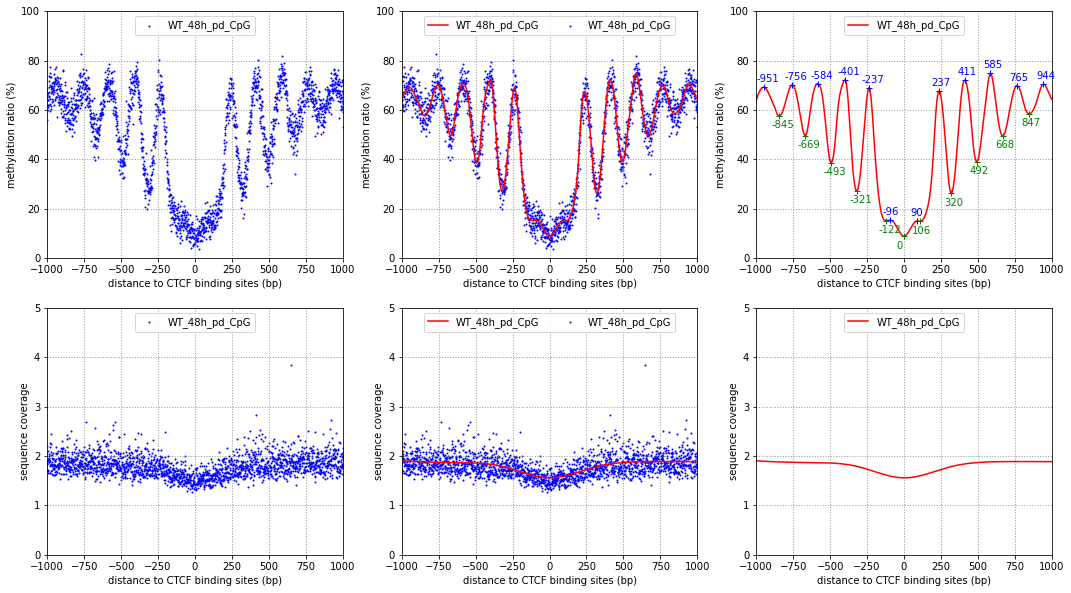

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev
from scipy.signal import find_peaks

input_file = '293T_ERT_WT_48h_pd.bismark.dedup.all_CpG_result.c1.CTCF.flank5000.stat.cut1_6.txt'
df = pd.read_csv(input_file, sep="\t", header=(0))
# distance	stack_n	avg_mC_ratio	avg_coverage	avg_mC_count	avg_unmC_count	mC_ratio_list	coverage_list	mC_count_list	unmC_count_list
distance = df.distance
avg_mC_ratio = df.avg_mC_ratio*100
avg_coverage = df.avg_coverage

# 
distance_new = np.linspace(-5000, 5000, 10000)
# 
tck_for_ratio = splrep(distance, avg_mC_ratio, s=186000)
avg_mC_ratio_smooth = splev(distance_new, tck_for_ratio)
peaks, _ = find_peaks(avg_mC_ratio_smooth)
valleys, _ = find_peaks(100-avg_mC_ratio_smooth)
#
tck_for_coverage = splrep(distance, avg_coverage, s=474)
avg_coverage_smooth = splev(distance_new, tck_for_coverage)


fig = plt.figure(figsize=(18, 10))
# ax1
ax1 = fig.add_subplot(231)
ax1.scatter(distance, avg_mC_ratio, color="b", s=1, label="WT_48h_pd_CpG")
ax1.set_xlim(-1000,1000)
ax1.set_ylim(0, 100)
ax1.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax1.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("methylation ratio (%)")

# ax2
ax2 = fig.add_subplot(232)
ax2.scatter(distance, avg_mC_ratio, color="b", s=1, label="WT_48h_pd_CpG")
ax2.plot(distance_new, avg_mC_ratio_smooth, 'r-', label="WT_48h_pd_CpG")
ax2.set_xlim(-1000, 1000)
ax2.set_ylim(0, 100)
ax2.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax2.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("methylation ratio (%)")
# ax3
ax3 = fig.add_subplot(233)
ax3.plot(distance_new, avg_mC_ratio_smooth, 'r-', label="WT_48h_pd_CpG")
# 标记 波峰summit， 波谷 valleys
for pi in peaks:
    if -1000 <= pi-5000 <= 1000:
        ax3.plot(pi-5000, avg_mC_ratio_smooth[pi], "+", color="b")
        ax3.text(pi-5000-50, avg_mC_ratio_smooth[pi]+2, str(pi-5000), color="b")
for vi in valleys:
    if -1000 <= vi-5000 <= 1000:
        ax3.plot(vi-5000, avg_mC_ratio_smooth[vi], "+", color="g")
        ax3.text(vi-5000-50, avg_mC_ratio_smooth[vi]-5, str(vi-5000), color="g")
ax3.set_xlim(-1000, 1000)
ax3.set_ylim(0, 100)
ax3.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax3.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("methylation ratio (%)")

# ax4
ax4 = fig.add_subplot(234)
ax4.scatter(distance, avg_coverage, color="b", s=1, label="WT_48h_pd_CpG")
ax4.set_xlim(-1000, 1000)
ax4.set_ylim(0, 5)
ax4.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax4.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("sequence coverage")
# ax5
ax5 = fig.add_subplot(235)
ax5.scatter(distance, avg_coverage, color="b", s=1, label="WT_48h_pd_CpG")
ax5.plot(distance_new, avg_coverage_smooth, 'r-', label="WT_48h_pd_CpG")
ax5.set_xlim(-1000, 1000)
ax5.set_ylim(0, 5)
ax5.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax5.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("sequence coverage")
# ax6
ax6 = fig.add_subplot(236)
ax6.plot(distance_new, avg_coverage_smooth, 'r-', label="WT_48h_pd_CpG")
ax6.set_xlim(-1000, 1000)
ax6.set_ylim(0, 5)
ax6.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax6.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("sequence coverage")

plt.show()
fig.savefig('293T_ERT_WT_48h_pd.bismark.dedup.all_CpG_result.c1.CTCF.f1k.stat.cut1_6.withSVMark.pdf')

## 293T_ERT_WT_48h_post_drug_GpC_c1_CTCF_f1k

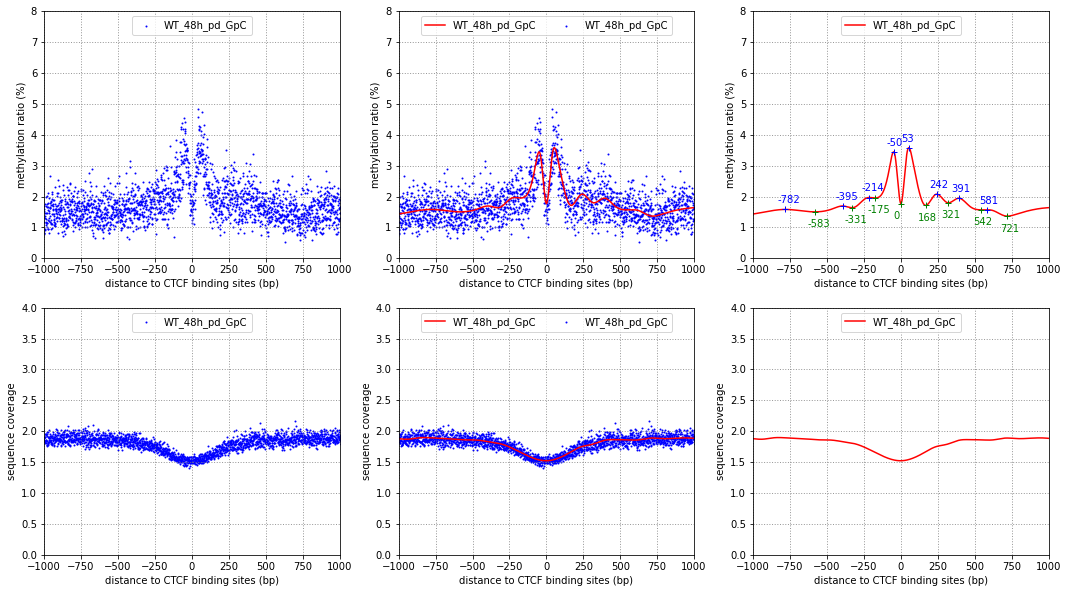

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev
from scipy.signal import find_peaks

input_file = '293T_ERT_WT_48h_pd.bismark.dedup.all_GpC_result.c1.CTCF.flank5000.stat.cut1_6.txt'
df = pd.read_csv(input_file, sep="\t", header=(0))
# distance	stack_n	avg_mC_ratio	avg_coverage	avg_mC_count	avg_unmC_count	mC_ratio_list	coverage_list	mC_count_list	unmC_count_list
distance = df.distance
avg_mC_ratio = df.avg_mC_ratio*100
avg_coverage = df.avg_coverage

# 
distance_new = np.linspace(-5000, 5000, 10000)
# 
tck_for_ratio = splrep(distance, avg_mC_ratio, s=1368)
avg_mC_ratio_smooth = splev(distance_new, tck_for_ratio)
peaks, _ = find_peaks(avg_mC_ratio_smooth)
valleys, _ = find_peaks(100-avg_mC_ratio_smooth)
#
tck_for_coverage = splrep(distance, avg_coverage, s=51)
avg_coverage_smooth = splev(distance_new, tck_for_coverage)


fig = plt.figure(figsize=(18, 10))
# ax1
ax1 = fig.add_subplot(231)
ax1.scatter(distance, avg_mC_ratio, color="b", s=1, label="WT_48h_pd_GpC")
ax1.set_xlim(-1000,1000)
ax1.set_ylim(0, 8)
ax1.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax1.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("methylation ratio (%)")
# ax2
ax2 = fig.add_subplot(232)
ax2.scatter(distance, avg_mC_ratio, color="b", s=1, label="WT_48h_pd_GpC")
ax2.plot(distance_new, avg_mC_ratio_smooth, 'r-', label="WT_48h_pd_GpC")
ax2.set_xlim(-1000, 1000)
ax2.set_ylim(0, 8)
ax2.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax2.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("methylation ratio (%)")
# ax3
ax3 = fig.add_subplot(233)
ax3.plot(distance_new, avg_mC_ratio_smooth, 'r-', label="WT_48h_pd_GpC")
# 标记 波峰summit， 波谷 valleys
for pi in peaks:
    if -1000 <= pi-5000 <= 1000:
        ax3.plot(pi-5000, avg_mC_ratio_smooth[pi], "+", color="b")
        ax3.text(pi-5000-50, avg_mC_ratio_smooth[pi]+0.2, str(pi-5000), color="b")
for vi in valleys:
    if -1000 <= vi-5000 <= 1000:
        ax3.plot(vi-5000, avg_mC_ratio_smooth[vi], "+", color="g")
        ax3.text(vi-5000-50, avg_mC_ratio_smooth[vi]-0.5, str(vi-5000), color="g")
ax3.set_xlim(-1000, 1000)
ax3.set_ylim(0, 8)
ax3.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax3.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("methylation ratio (%)")

# ax4
ax4 = fig.add_subplot(234)
ax4.scatter(distance, avg_coverage, color="b", s=1, label="WT_48h_pd_GpC")
ax4.set_xlim(-1000, 1000)
ax4.set_ylim(0, 4)
ax4.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax4.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("sequence coverage")
# ax5
ax5 = fig.add_subplot(235)
ax5.scatter(distance, avg_coverage, color="b", s=1, label="WT_48h_pd_GpC")
ax5.plot(distance_new, avg_coverage_smooth, 'r-', label="WT_48h_pd_GpC")
ax5.set_xlim(-1000, 1000)
ax5.set_ylim(0, 4)
ax5.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax5.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("sequence coverage")
# ax6
ax6 = fig.add_subplot(236)
ax6.plot(distance_new, avg_coverage_smooth, 'r-', label="WT_48h_pd_GpC")
ax6.set_xlim(-1000, 1000)
ax6.set_ylim(0, 4)
ax6.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax6.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("sequence coverage")

plt.show()
fig.savefig('293T_ERT_WT_48h_pd.bismark.dedup.all_GpC_result.c1.CTCF.f1k.stat.cut1_6.withSVMark.pdf')

 ## 293T_ERT_CTCF_24h_post_drug_Rep1_CpG_c1_CTCF_f1k

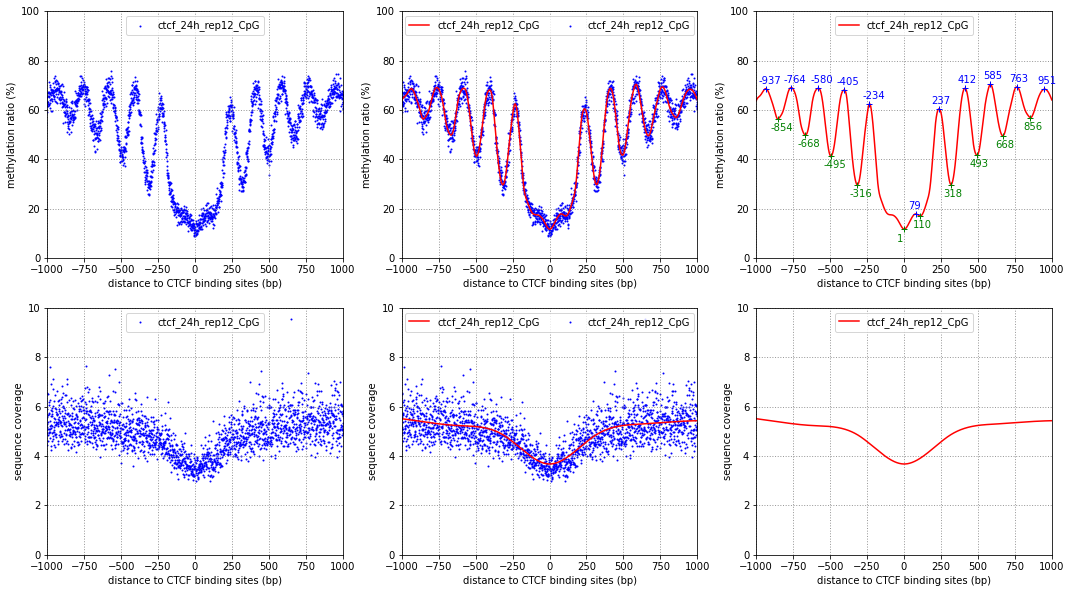

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev
from scipy.signal import find_peaks

input_file = '293T_ERT_CTCF_24h_pd_rep12.bismark_bt2_pe.dedup.merged.all_CpG_result.c1.CTCF.flank5000.stat.cut1_6.txt'
df = pd.read_csv(input_file, sep="\t", header=(0))
# distance	stack_n	avg_mC_ratio	avg_coverage	avg_mC_count	avg_unmC_count	mC_ratio_list	coverage_list	mC_count_list	unmC_count_list
distance = df.distance
avg_mC_ratio = df.avg_mC_ratio*100
avg_coverage = df.avg_coverage

# 
distance_new = np.linspace(-5000, 5000, 10000)
# 
tck_for_ratio = splrep(distance, avg_mC_ratio, s=72000)
avg_mC_ratio_smooth = splev(distance_new, tck_for_ratio)
peaks, _ = find_peaks(avg_mC_ratio_smooth)
valleys, _ = find_peaks(100-avg_mC_ratio_smooth)
#
tck_for_coverage = splrep(distance, avg_coverage, s=4250)
avg_coverage_smooth = splev(distance_new, tck_for_coverage)


fig = plt.figure(figsize=(18, 10))
# ax1
ax1 = fig.add_subplot(231)
ax1.scatter(distance, avg_mC_ratio, color="b", s=1, label="ctcf_24h_rep12_CpG")
ax1.set_xlim(-1000,1000)
ax1.set_ylim(0, 100)
ax1.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax1.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("methylation ratio (%)")
# ax2
ax2 = fig.add_subplot(232)
ax2.scatter(distance, avg_mC_ratio, color="b", s=1, label="ctcf_24h_rep12_CpG")
ax2.plot(distance_new, avg_mC_ratio_smooth, 'r-', label="ctcf_24h_rep12_CpG")
ax2.set_xlim(-1000, 1000)
ax2.set_ylim(0, 100)
ax2.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax2.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("methylation ratio (%)")
# ax3
ax3 = fig.add_subplot(233)
ax3.plot(distance_new, avg_mC_ratio_smooth, 'r-', label="ctcf_24h_rep12_CpG")
# 标记 波峰summit， 波谷 valleys
for pi in peaks:
    if -1000 <= pi-5000 <= 1000:
        ax3.plot(pi-5000, avg_mC_ratio_smooth[pi], "+", color="b")
        ax3.text(pi-5000-50, avg_mC_ratio_smooth[pi]+2, str(pi-5000), color="b")
for vi in valleys:
    if -1000 <= vi-5000 <= 1000:
        ax3.plot(vi-5000, avg_mC_ratio_smooth[vi], "+", color="g")
        ax3.text(vi-5000-50, avg_mC_ratio_smooth[vi]-5, str(vi-5000), color="g")
ax3.set_xlim(-1000, 1000)
ax3.set_ylim(0, 100)
ax3.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax3.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("methylation ratio (%)")

# ax4
ax4 = fig.add_subplot(234)
ax4.scatter(distance, avg_coverage, color="b", s=1, label="ctcf_24h_rep12_CpG")
ax4.set_xlim(-1000, 1000)
ax4.set_ylim(0, 10)
ax4.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax4.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("sequence coverage")
# ax5
ax5 = fig.add_subplot(235)
ax5.scatter(distance, avg_coverage, color="b", s=1, label="ctcf_24h_rep12_CpG")
ax5.plot(distance_new, avg_coverage_smooth, 'r-', label="ctcf_24h_rep12_CpG")
ax5.set_xlim(-1000, 1000)
ax5.set_ylim(0, 10)
ax5.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax5.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("sequence coverage")
# ax6
ax6 = fig.add_subplot(236)
ax6.plot(distance_new, avg_coverage_smooth, 'r-', label="ctcf_24h_rep12_CpG")
ax6.set_xlim(-1000, 1000)
ax6.set_ylim(0, 10)
ax6.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax6.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("sequence coverage")

plt.show()
fig.savefig('293T_ERT_CTCF_24h_pd_rep12.bismark_bt2_pe.dedup.merged.all_CpG_result.c1.CTCF.f1k.stat.cut1_6.withSVMark.pdf')


## 293T_ERT_CTCF_24h_post_drug_Rep1_GpC_c1_CTCF_f1k

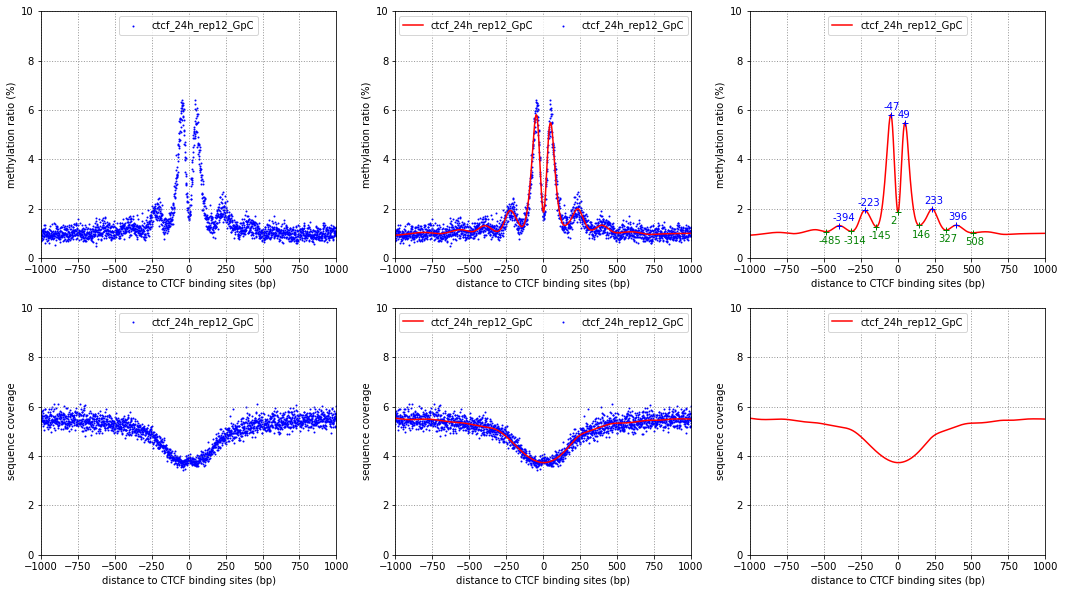

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev
from scipy.signal import find_peaks

input_file = '293T_ERT_CTCF_24h_pd_rep12.bismark_bt2_pe.dedup.merged.all_GpC_result.c1.CTCF.flank5000.stat.cut1_6.txt'
df = pd.read_csv(input_file, sep="\t", header=(0))
# distance	stack_n	avg_mC_ratio	avg_coverage	avg_mC_count	avg_unmC_count	mC_ratio_list	coverage_list	mC_count_list	unmC_count_list
distance = df.distance
avg_mC_ratio = df.avg_mC_ratio*100
avg_coverage = df.avg_coverage

# 
distance_new = np.linspace(-5000, 5000, 10000)
# 
tck_for_ratio = splrep(distance, avg_mC_ratio, s=310)
avg_mC_ratio_smooth = splev(distance_new, tck_for_ratio)
peaks, _ = find_peaks(avg_mC_ratio_smooth)
valleys, _ = find_peaks(100-avg_mC_ratio_smooth)
#
tck_for_coverage = splrep(distance, avg_coverage, s=495)
avg_coverage_smooth = splev(distance_new, tck_for_coverage)


fig = plt.figure(figsize=(18, 10))
# ax1
ax1 = fig.add_subplot(231)
ax1.scatter(distance, avg_mC_ratio, color="b", s=1, label="ctcf_24h_rep12_GpC")
ax1.set_xlim(-1000,1000)
ax1.set_ylim(0, 10)
ax1.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax1.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("methylation ratio (%)")
# ax2
ax2 = fig.add_subplot(232)
ax2.scatter(distance, avg_mC_ratio, color="b", s=1, label="ctcf_24h_rep12_GpC")
ax2.plot(distance_new, avg_mC_ratio_smooth, 'r-', label="ctcf_24h_rep12_GpC")
ax2.set_xlim(-1000, 1000)
ax2.set_ylim(0, 10)
ax2.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax2.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("methylation ratio (%)")
# ax3
ax3 = fig.add_subplot(233)
ax3.plot(distance_new, avg_mC_ratio_smooth, 'r-', label="ctcf_24h_rep12_GpC")
# 标记 波峰summit， 波谷 valleys
for pi in peaks:
    if -1000 <= pi-5000 <= 1000 and avg_mC_ratio_smooth[pi] >= 1.2:
        ax3.plot(pi-5000, avg_mC_ratio_smooth[pi], "+", color="b")
        ax3.text(pi-5000-50, avg_mC_ratio_smooth[pi]+0.2, str(pi-5000), color="b")
for vi in valleys:
    if -1000 <= vi-5000 <= 1000 and avg_mC_ratio_smooth[vi] >= 1:
        ax3.plot(vi-5000, avg_mC_ratio_smooth[vi], "+", color="g")
        ax3.text(vi-5000-50, avg_mC_ratio_smooth[vi]-0.5, str(vi-5000), color="g")
ax3.set_xlim(-1000, 1000)
ax3.set_ylim(0, 10)
ax3.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax3.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("methylation ratio (%)")

# ax4
ax4 = fig.add_subplot(234)
ax4.scatter(distance, avg_coverage, color="b", s=1, label="ctcf_24h_rep12_GpC")
ax4.set_xlim(-1000, 1000)
ax4.set_ylim(0, 10)
ax4.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax4.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("sequence coverage")
# ax5
ax5 = fig.add_subplot(235)
ax5.scatter(distance, avg_coverage, color="b", s=1, label="ctcf_24h_rep12_GpC")
ax5.plot(distance_new, avg_coverage_smooth, 'r-', label="ctcf_24h_rep12_GpC")
ax5.set_xlim(-1000, 1000)
ax5.set_ylim(0, 10)
ax5.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax5.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("sequence coverage")
# ax6
ax6 = fig.add_subplot(236)
ax6.plot(distance_new, avg_coverage_smooth, 'r-', label="ctcf_24h_rep12_GpC")
ax6.set_xlim(-1000, 1000)
ax6.set_ylim(0, 10)
ax6.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax6.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("sequence coverage")

plt.show()
fig.savefig('293T_ERT_CTCF_24h_pd_rep12.bismark_bt2_pe.dedup.merged.all_GpC_result.c1.CTCF.f1k.stat.cut1_6.withSVMark.pdf')


## 293T_ERT_CTCF_48h_post_drug_Rep1_CpG_c1_CTCF_f1k

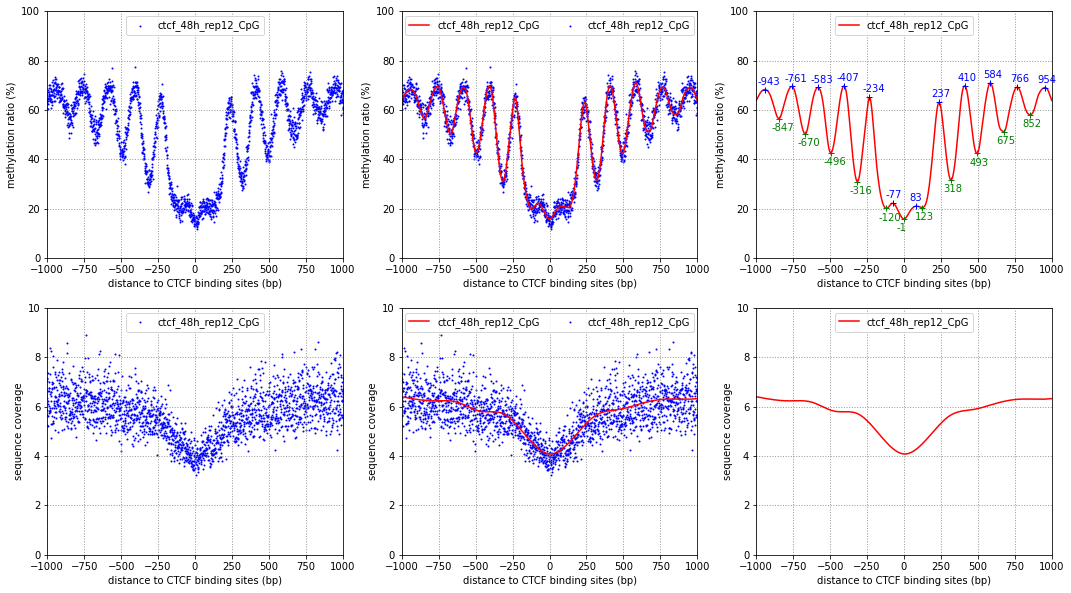

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev
from scipy.signal import find_peaks

input_file = '293T_ERT_CTCF_48h_pd_rep12.bismark_bt2_pe.dedup.merged.all_CpG_result.c1.CTCF.flank5000.stat.cut1_6.txt'
df = pd.read_csv(input_file, sep="\t", header=(0))
# distance	stack_n	avg_mC_ratio	avg_coverage	avg_mC_count	avg_unmC_count	mC_ratio_list	coverage_list	mC_count_list	unmC_count_list
distance = df.distance
avg_mC_ratio = df.avg_mC_ratio*100
avg_coverage = df.avg_coverage

# 
distance_new = np.linspace(-5000, 5000, 10000)
# 
tck_for_ratio = splrep(distance, avg_mC_ratio, s=74000)
avg_mC_ratio_smooth = splev(distance_new, tck_for_ratio)
peaks, _ = find_peaks(avg_mC_ratio_smooth)
valleys, _ = find_peaks(100-avg_mC_ratio_smooth)
#
tck_for_coverage = splrep(distance, avg_coverage, s=5960)
avg_coverage_smooth = splev(distance_new, tck_for_coverage)


fig = plt.figure(figsize=(18, 10))
# ax1
ax1 = fig.add_subplot(231)
ax1.scatter(distance, avg_mC_ratio, color="b", s=1, label="ctcf_48h_rep12_CpG")
ax1.set_xlim(-1000,1000)
ax1.set_ylim(0, 100)
ax1.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax1.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("methylation ratio (%)")
# ax2
ax2 = fig.add_subplot(232)
ax2.scatter(distance, avg_mC_ratio, color="b", s=1, label="ctcf_48h_rep12_CpG")
ax2.plot(distance_new, avg_mC_ratio_smooth, 'r-', label="ctcf_48h_rep12_CpG")
ax2.set_xlim(-1000, 1000)
ax2.set_ylim(0, 100)
ax2.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax2.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("methylation ratio (%)")
# ax3
ax3 = fig.add_subplot(233)
ax3.plot(distance_new, avg_mC_ratio_smooth, 'r-', label="ctcf_48h_rep12_CpG")
# 标记 波峰summit， 波谷 valleys
for pi in peaks:
    if -1000 <= pi-5000 <= 1000:
        ax3.plot(pi-5000, avg_mC_ratio_smooth[pi], "+", color="b")
        ax3.text(pi-5000-50, avg_mC_ratio_smooth[pi]+2, str(pi-5000), color="b")
for vi in valleys:
    if -1000 <= vi-5000 <= 1000:
        ax3.plot(vi-5000, avg_mC_ratio_smooth[vi], "+", color="g")
        ax3.text(vi-5000-50, avg_mC_ratio_smooth[vi]-5, str(vi-5000), color="g")
ax3.set_xlim(-1000, 1000)
ax3.set_ylim(0, 100)
ax3.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax3.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("methylation ratio (%)")

# ax4
ax4 = fig.add_subplot(234)
ax4.scatter(distance, avg_coverage, color="b", s=1, label="ctcf_48h_rep12_CpG")
ax4.set_xlim(-1000, 1000)
ax4.set_ylim(0, 10)
ax4.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax4.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("sequence coverage")
# ax5
ax5 = fig.add_subplot(235)
ax5.scatter(distance, avg_coverage, color="b", s=1, label="ctcf_48h_rep12_CpG")
ax5.plot(distance_new, avg_coverage_smooth, 'r-', label="ctcf_48h_rep12_CpG")
ax5.set_xlim(-1000, 1000)
ax5.set_ylim(0, 10)
ax5.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax5.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("sequence coverage")
# ax6
ax6 = fig.add_subplot(236)
ax6.plot(distance_new, avg_coverage_smooth, 'r-', label="ctcf_48h_rep12_CpG")
ax6.set_xlim(-1000, 1000)
ax6.set_ylim(0, 10)
ax6.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax6.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("sequence coverage")

plt.show()
fig.savefig('293T_ERT_CTCF_48h_pd_rep12.bismark_bt2_pe.dedup.merged.all_CpG_result.c1.CTCF.f1k.stat.cut1_6.withSVMark.pdf')

## 293T_ERT_CTCF_48h_post_drug_Rep1_GpC_c1_CTCF_f1k

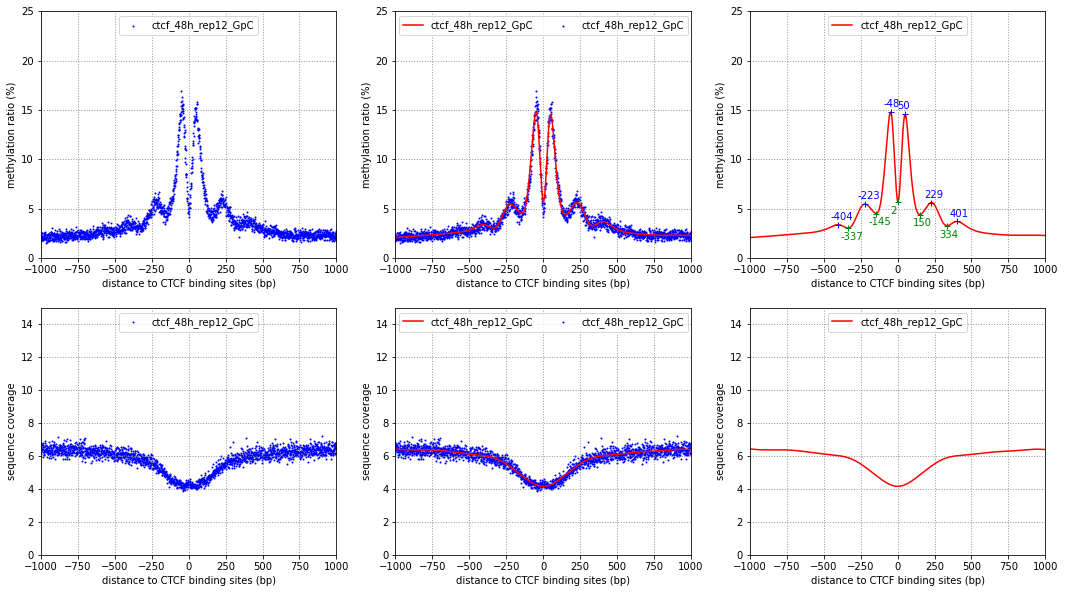

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev
from scipy.signal import find_peaks

input_file = '293T_ERT_CTCF_48h_pd_rep12.bismark_bt2_pe.dedup.merged.all_GpC_result.c1.CTCF.flank5000.stat.cut1_6.txt'
df = pd.read_csv(input_file, sep="\t", header=(0))
# distance	stack_n	avg_mC_ratio	avg_coverage	avg_mC_count	avg_unmC_count	mC_ratio_list	coverage_list	mC_count_list	unmC_count_list
distance = df.distance
avg_mC_ratio = df.avg_mC_ratio*100
avg_coverage = df.avg_coverage

# 
distance_new = np.linspace(-5000, 5000, 10000)
# 
tck_for_ratio = splrep(distance, avg_mC_ratio, s=770)
avg_mC_ratio_smooth = splev(distance_new, tck_for_ratio)
peaks, _ = find_peaks(avg_mC_ratio_smooth)
valleys, _ = find_peaks(100-avg_mC_ratio_smooth)
#
tck_for_coverage = splrep(distance, avg_coverage, s=710)
avg_coverage_smooth = splev(distance_new, tck_for_coverage)


fig = plt.figure(figsize=(18, 10))
# ax1
ax1 = fig.add_subplot(231)
ax1.scatter(distance, avg_mC_ratio, color="b", s=1, label="ctcf_48h_rep12_GpC")
ax1.set_xlim(-1000,1000)
ax1.set_ylim(0, 25)
ax1.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax1.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("methylation ratio (%)")
# ax2
ax2 = fig.add_subplot(232)
ax2.scatter(distance, avg_mC_ratio, color="b", s=1, label="ctcf_48h_rep12_GpC")
ax2.plot(distance_new, avg_mC_ratio_smooth, 'r-', label="ctcf_48h_rep12_GpC")
ax2.set_xlim(-1000, 1000)
ax2.set_ylim(0, 25)
ax2.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax2.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("methylation ratio (%)")
# ax3
ax3 = fig.add_subplot(233)
ax3.plot(distance_new, avg_mC_ratio_smooth, 'r-', label="ctcf_48h_rep12_GpC")
# 标记 波峰summit， 波谷 valleys
for pi in peaks:
    if -1000 <= pi-5000 <= 1000 and avg_mC_ratio_smooth[pi] >= 3:
        ax3.plot(pi-5000, avg_mC_ratio_smooth[pi], "+", color="b")
        ax3.text(pi-5000-50, avg_mC_ratio_smooth[pi]+0.5, str(pi-5000), color="b")
for vi in valleys:
    if -1000 <= vi-5000 <= 1000 and avg_mC_ratio_smooth[vi] >= 3:
        ax3.plot(vi-5000, avg_mC_ratio_smooth[vi], "+", color="g")
        ax3.text(vi-5000-50, avg_mC_ratio_smooth[vi]-1.2, str(vi-5000), color="g")
ax3.set_xlim(-1000, 1000)
ax3.set_ylim(0, 25)
ax3.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax3.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("methylation ratio (%)")

# ax4
ax4 = fig.add_subplot(234)
ax4.scatter(distance, avg_coverage, color="b", s=1, label="ctcf_48h_rep12_GpC")
ax4.set_xlim(-1000, 1000)
ax4.set_ylim(0, 15)
ax4.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax4.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("sequence coverage")
# ax5
ax5 = fig.add_subplot(235)
ax5.scatter(distance, avg_coverage, color="b", s=1, label="ctcf_48h_rep12_GpC")
ax5.plot(distance_new, avg_coverage_smooth, 'r-', label="ctcf_48h_rep12_GpC")
ax5.set_xlim(-1000, 1000)
ax5.set_ylim(0, 15)
ax5.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax5.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("sequence coverage")
# ax6
ax6 = fig.add_subplot(236)
ax6.plot(distance_new, avg_coverage_smooth, 'r-', label="ctcf_48h_rep12_GpC")
ax6.set_xlim(-1000, 1000)
ax6.set_ylim(0, 15)
ax6.grid(ls=":", lw=1, color="gray", alpha=0.8)
ax6.legend(loc="upper center", ncol=2 )
plt.xlabel("distance to CTCF binding sites (bp)")
plt.ylabel("sequence coverage")

plt.show()
fig.savefig('293T_ERT_CTCF_48h_pd_rep12.bismark_bt2_pe.dedup.merged.all_GpC_result.c1.CTCF.f1k.stat.cut1_6.withSVMark.pdf')
